In [9]:
import pennylane as qml
from pennylane import numpy as np

# 4 qubits, one for each particle
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

def encode_features(features):
    for i in range(n_qubits):
        pt, eta, phi = features[i]
        qml.RY(pt, wires=i)
        qml.RZ(phi + eta, wires=i)

def entangle_graph(edge_list):
    for i, j in edge_list:
        qml.CNOT(wires=[i, j])

@qml.qnode(dev)
def qgnn_circuit(features, edges):
    encode_features(features)
    entangle_graph(edges)

    # Variational layer (can be trained)
    for i in range(n_qubits):
        qml.RY(np.pi / 4, wires=i)
        qml.RZ(np.pi / 6, wires=i)

    entangle_graph(edges)  # second layer of entanglement

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


In [10]:
features = np.array([[0.4, 0.1, 0.2],
                     [0.6, -0.2, -0.1],
                     [0.3, 0.5, 0.3],
                     [0.7, -0.3, 0.4]])

edges = [(0, 1), (1, 2), (2, 3)]  # k-NN graph

print(qml.draw(qgnn_circuit)(features, edges))


0: ──RY(0.40)──RZ(0.30)──╭●──RY(0.79)──RZ(0.52)───────────╭●──────────────┤  <Z>
1: ──RY(0.60)──RZ(-0.30)─╰X─╭●─────────RY(0.79)──RZ(0.52)─╰X────────╭●────┤  <Z>
2: ──RY(0.30)──RZ(0.80)─────╰X────────╭●─────────RY(0.79)──RZ(0.52)─╰X─╭●─┤  <Z>
3: ──RY(0.70)──RZ(0.10)───────────────╰X─────────RY(0.79)──RZ(0.52)────╰X─┤  <Z>


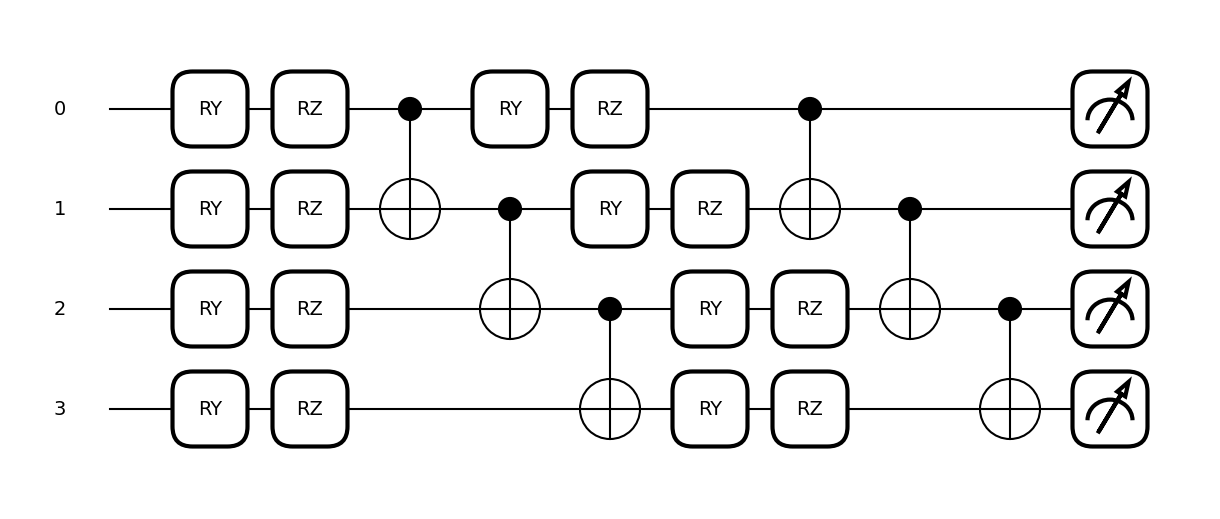

In [11]:
fig = qml.draw_mpl(qgnn_circuit)(features, edges)
plt.show()
